<a href="https://colab.research.google.com/github/lilyontherocks/lilyontherocks/blob/main/Classifiers_Linda_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IBK alternative KNN**

---



**Import relevant libraries and modules:**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/AdultDataset.csv') #for this i saved the file on my google drive
data.head()

Mounted at /content/drive


age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

**Data Cleaning:** Drop all the rows with '?'


In [6]:
data = data[data['workclass'] != '?']
data = data[data['education'] != '?']
data = data[data['marital-status'] != '?']
data = data[data['occupation'] != '?']
data = data[data['relationship'] != '?']
data = data[data['race'] != '?']
data = data[data['sex'] != '?']

data = data[data['capital-gain'] != '?']
data = data[data['capital-loss'] != '?']
data = data[data['hours-per-week'] != '?']
data = data[data['native-country'] != '?']
data = data[data['income'] != '?']
data

age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
5       34       Private  198693          10th              6   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male   
2      Married-civ-spouse    Protective-serv        Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
5           Never-married      Other-service  Not-in-family  White    Male   
...                   ...                ...            ...    ...     ...   
48837  Married-civ-spouse       Tech-support           Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
48839             Widowed       Adm-clerical      Unmarried  White  Female   
48840       Never-married       Adm-clerical      Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
5                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[45222 rows x 15 columns]

In [10]:
classifier_data = data.copy()
classifier_data ['workclass'], workclass = pd.factorize(classifier_data ['workclass'])
classifier_data ['education'], education = pd.factorize(classifier_data ['education'])
classifier_data ['marital-status'], marital_status = pd.factorize(classifier_data ['marital-status'])
classifier_data ['occupation'], occupation = pd.factorize(classifier_data ['occupation'])
classifier_data ['relationship'], relationship = pd.factorize(classifier_data ['relationship'])
classifier_data ['race'], race = pd.factorize(classifier_data ['race'])
classifier_data ['sex'], sex = pd.factorize(classifier_data ['sex'])
classifier_data ['native-country'], country = pd.factorize(classifier_data ['native-country'])

def score(x):
  if x == '<=50K': # earning <=50k as 1
    return 0
  elif x == '>50K': # earning >50k as 0
    return 1;

classifier_data['income'] = classifier_data['income'].apply(score)
classifier_data


age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country  income  
0                  40               0       0  
1                  50               0       0  
2                  40               0       1  
3                  40               0       1  
5                  30               0       0  
...               ...             ...     ...  
48837              38               0       0  
48838              40               0       1  
48839              40               0       0  
48840              20               0       0  
48841              40               0       1  

[45222 rows x 15 columns]

Quick data *correlation* visualisation

In [11]:
cr = classifier_data.corr()
cr

age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.181807 -0.075792   0.084585       0.037623   
workclass       0.181807   1.000000 -0.044409   0.075195       0.160294   
fnlwgt         -0.075792  -0.044409  1.000000   0.005953      -0.041993   
education       0.084585   0.075195  0.005953   1.000000       0.315990   
education-num   0.037623   0.160294 -0.041993   0.315990       1.000000   
marital-status  0.320560   0.022204 -0.022194  -0.023231      -0.025666   
occupation     -0.014442  -0.030872  0.016508  -0.035944       0.023021   
relationship    0.114993  -0.023269  0.003905   0.015067      -0.012195   
race           -0.007772   0.019150 -0.117547   0.061717       0.068783   
sex            -0.082053  -0.077519 -0.027240  -0.029461      -0.003417   
capital-gain    0.079683   0.072377 -0.004110   0.067387       0.126907   
capital-loss    0.059351   0.035317 -0.004349   0.042655       0.081711   
hours-per-week  0.101992   0.103838 -0.018679   0.063713       0.146206   
native-country  0.022617  -0.005135  0.018280   0.075668      -0.018316   
income          0.237040   0.137756 -0.007264   0.179285       0.332800   

                marital-status  occupation  relationship      race       sex  \
age                   0.320560   -0.014442      0.114993 -0.007772 -0.082053   
workclass             0.022204   -0.030872     -0.023269  0.019150 -0.077519   
fnlwgt               -0.022194    0.016508      0.003905 -0.117547 -0.027240   
education            -0.023231   -0.035944      0.015067  0.061717 -0.029461   
education-num        -0.025666    0.023021     -0.012195  0.068783 -0.003417   
marital-status        1.000000   -0.018094      0.287051 -0.018952  0.181810   
occupation           -0.018094    1.000000     -0.040628 -0.000263 -0.045695   
relationship          0.287051   -0.040628      1.000000 -0.015607  0.399240   
race                 -0.018952   -0.000263     -0.015607  1.000000 -0.045744   
sex                   0.181810   -0.045695      0.399240 -0.045744  1.000000   
capital-gain          0.005232    0.003310     -0.012626  0.013398 -0.047444   
capital-loss         -0.000781    0.012884     -0.010438  0.007861 -0.046457   
hours-per-week        0.067367    0.021049     -0.006057  0.016639 -0.231425   
native-country        0.004772   -0.030379      0.054235  0.257581  0.000565   
income               -0.029757    0.042601     -0.067427  0.040552 -0.215760   

                capital-gain  capital-loss  hours-per-week  native-country  \
age                 0.079683      0.059351        0.101992        0.022617   
workclass           0.072377      0.035317        0.103838       -0.005135   
fnlwgt             -0.004110     -0.004349       -0.018679        0.018280   
education           0.067387      0.042655        0.063713        0.075668   
education-num       0.126907      0.081711        0.146206       -0.018316   
marital-status      0.005232     -0.000781        0.067367        0.004772   
occupation          0.003310      0.012884        0.021049       -0.030379   
relationship       -0.012626     -0.010438       -0.006057        0.054235   
race                0.013398      0.007861        0.016639        0.257581   
sex                -0.047444     -0.046457       -0.231425        0.000565   
capital-gain        1.000000     -0.032102        0.083880       -0.006349   
capital-loss       -0.032102      1.000000        0.054195        0.000399   
hours-per-week      0.083880      0.054195        1.000000       -0.002327   
native-country     -0.006349      0.000399       -0.002327        1.000000   
income              0.221034      0.148687        0.227199       -0.000852   

                  income  
age             0.237040  
workclass       0.137756  
fnlwgt         -0.007264  
education       0.179285  
education-num   0.332800  
marital-status -0.029757  
occupation      0.042601  
relationship   -0.067427  
race            0.040552  
sex            -0.21

<Axes: >

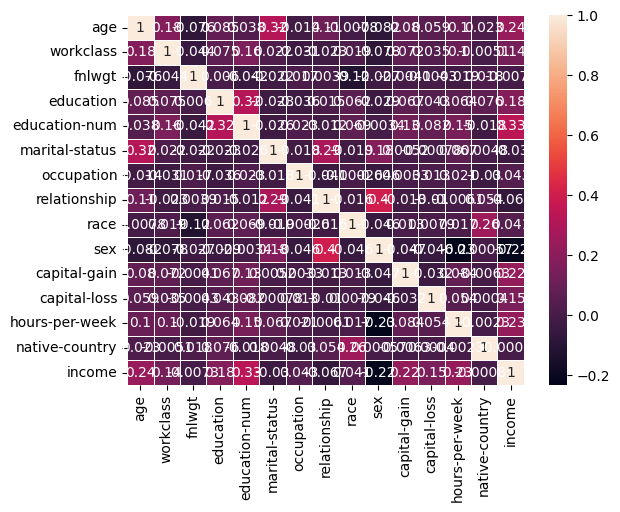

In [13]:
sns.heatmap(cr, annot=True, fmt=".2g",
            linewidths = 0.55,
            linecolor = "white")

Create copy to keep the original dataset for the rest of classifiers unaltered and factorize data to be usable for KNN

In [14]:
KNN_df = data.copy()
KNN_df['workclass'] = pd.factorize(KNN_df['workclass'])[0]
KNN_df['education'] = pd.factorize(KNN_df['education'])[0]
KNN_df['marital-status'] = pd.factorize(KNN_df['marital-status'])[0]
KNN_df['occupation'] = pd.factorize(KNN_df['occupation'])[0]
KNN_df['relationship'] = pd.factorize(KNN_df['relationship'])[0]
KNN_df['race'] = pd.factorize(KNN_df['race'])[0]
KNN_df['sex'] = pd.factorize(KNN_df['sex'])[0]
KNN_df['native-country'] = pd.factorize(KNN_df['native-country'])[0]

In [15]:
KNN_df

age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country income  
0                  40               0  <=50K  
1                  50               0  <=50K  
2                  40               0   >50K  
3                  40               0   >50K  
5                  30               0  <=50K  
...               ...             ...    ...  
48837              38               0  <=50K  
48838              40               0   >50K  
48839              40               0  <=50K  
48840              20               0  <=50K  
48841              40               0   >50K  

[45222 rows x 15 columns]

Create copy

In [16]:
def score(x):
  if x == '<=50K': # earning >50k as 0
    return 0
  elif x == '>50K': # earning <=50k as 1
    return 1;

KNN_df['income'] = KNN_df['income'].apply(score)
KNN_df

age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country  income  
0                  40               0       0  
1                  50               0       0  
2                  40               0       1  
3                  40               0       1  
5                  30               0       0  
...               ...             ...     ...  
48837              38               0       0  
48838              40               0       1  
48839              40               0       0  
48840              20               0       0  
48841              40               0       1  

[45222 rows x 15 columns]

**Define the features and the target:**

In [17]:
target = KNN_df['income']
features = KNN_df.drop('income', axis=1)

In [18]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

**Split the features and target:**

In [19]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

**Fitting and evaluating the model:**

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
target_pred = knn.predict(features_test)
target_pred

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
acc = accuracy_score(target_test, target_pred)
acc

0.8151784529653708

In [23]:
f1_score(target_test, target_pred, average='weighted')

0.8142657294133201

In [26]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, features_train, target_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

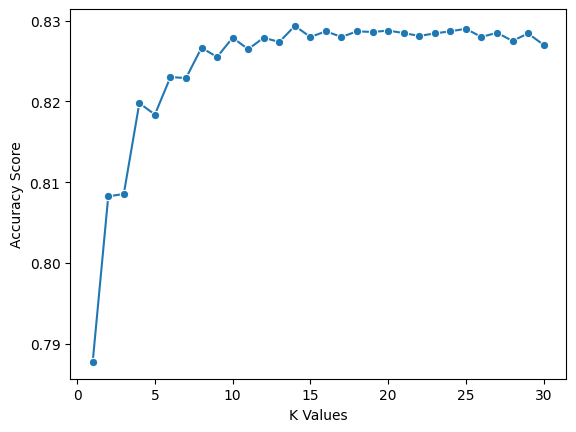

In [27]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [28]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=14)

In [29]:
target_pred = knn.predict(features_test)
target_pred

array([0, 0, 0, ..., 1, 0, 0])

In [30]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
#print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)

Accuracy: 0.8289328203086993
Precision: 0.7764742454192677
Precision: 0.8289328203086993
Precision: 0.8204055798197901
Recall: 0.7353978647407415
Recall: 0.8289328203086993
Recall: 0.8289328203086993
RMSE: 0.41360268337052736


In [31]:
cm = confusion_matrix(y_true = target_test, y_pred = target_pred, normalize='all')
cm

array([[0.69342355, 0.06085534],
       [0.11021184, 0.13550927]])

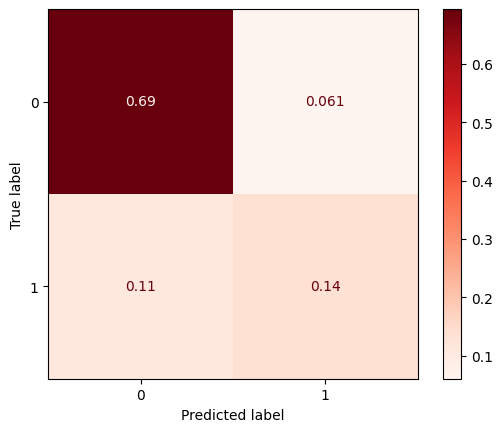

In [32]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [33]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.89019474, 0.61304522])

In [34]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7516199803034824

In [35]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8289328203086992

In [36]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8220932539634103

# **Random Forest**

In [37]:
rf_data = KNN_df.copy()

In [ ]:
rf_data

age  workclass  fnlwgt  education  education-num  marital-status  \
0       25          0  226802          0              7               0   
1       38          0   89814          1              9               1   
2       28          1  336951          2             12               1   
3       44          0  160323          3             10               1   
5       34          0  198693          4              6               0   
...    ...        ...     ...        ...            ...             ...   
48837   27          0  257302          2             12               1   
48838   40          0  154374          1              9               1   
48839   58          0  151910          1              9               2   
48840   22          0  201490          1              9               0   
48841   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0             0     0    0             0             0   
1               1             1     1    0             0             0   
2               2             1     1    0             0             0   
3               0             1     0    0          7688             0   
5               3             2     1    0             0             0   
...           ...           ...   ...  ...           ...           ...   
48837           8             4     1    1             0             0   
48838           0             1     1    0             0             0   
48839           6             3     1    1             0             0   
48840           6             0     1    0             0             0   
48841           7             4     1    1         15024             0   

       hours-per-week  native-country  income  
0                  40               0       0  
1                  50               0       0  
2                  40               0       1  
3                  40               0       1  
5                  30               0       0  
...               ...             ...     ...  
48837              38               0       0  
48838              40               0       1  
48839              40               0       0  
48840              20               0       0  
48841              40               0       1  

[45222 rows x 15 columns]

In [38]:
target = rf_data['income']
features = rf_data.drop('income', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

In [39]:
RDF_2 = RandomForestClassifier(n_estimators=2)
RDF_2 = RDF_2.fit(features_train, target_train)

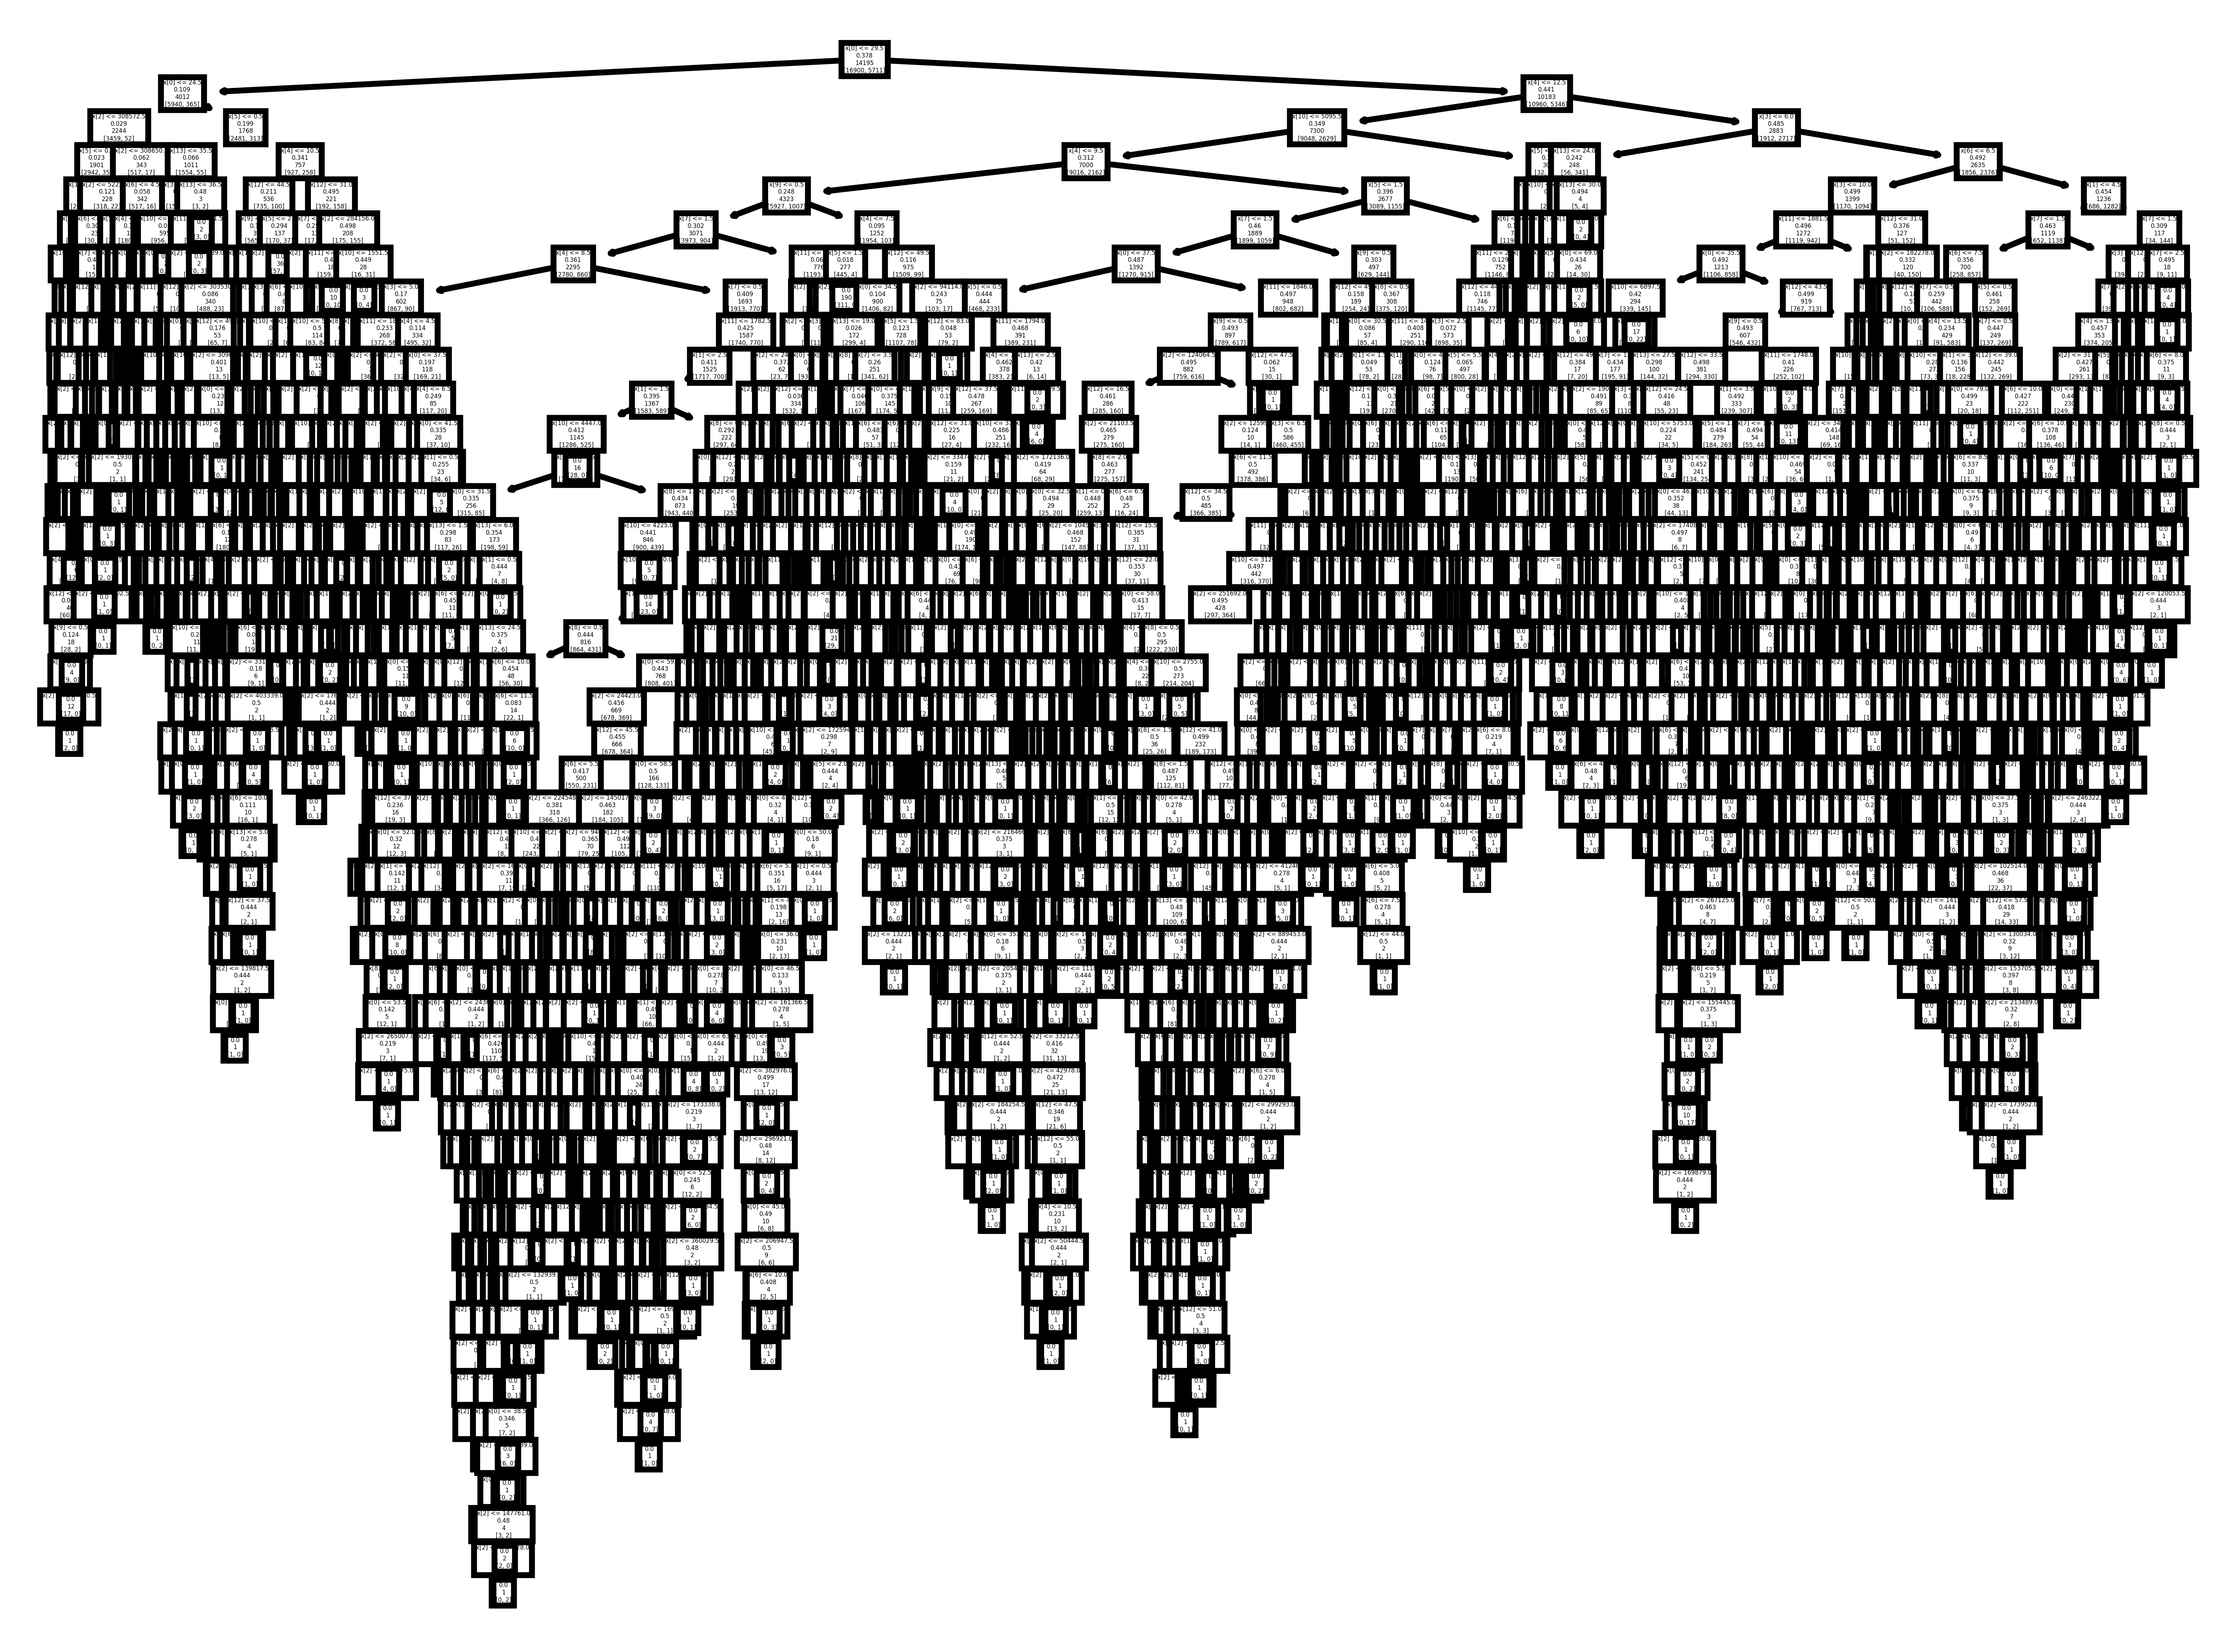

In [40]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_2.estimators_[0], label=None);

In [41]:
target_pred = RDF_2.predict(features_test)
target_pred

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8211489982751758
Precision: 0.7788323215698798
Precision: 0.8211489982751758
Precision: 0.8100531227909302
Recall: 0.6986192435506957
Recall: 0.8211489982751758
Recall: 0.8211489982751758
RMSE: 0.4229077934075278
[[16017  1006]
 [ 3038  2550]]


In [43]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.70837203, 0.04449162],
       [0.13435938, 0.11277697]])

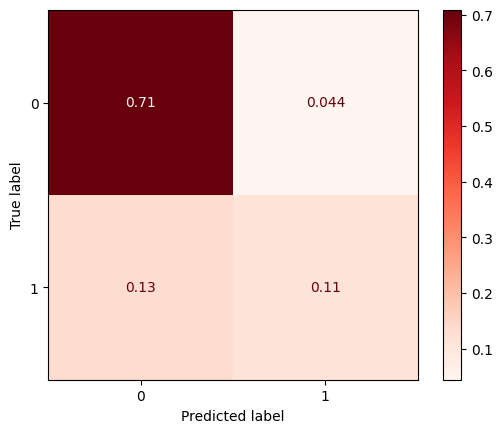

In [44]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [45]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.88790953, 0.55774278])

In [46]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7228261557526496

In [47]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8211489982751758

In [48]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8063133247023107

N-5

In [49]:
RDF_5 = RandomForestClassifier(n_estimators=5)
RDF_5 = RDF_5.fit(features_train, target_train)

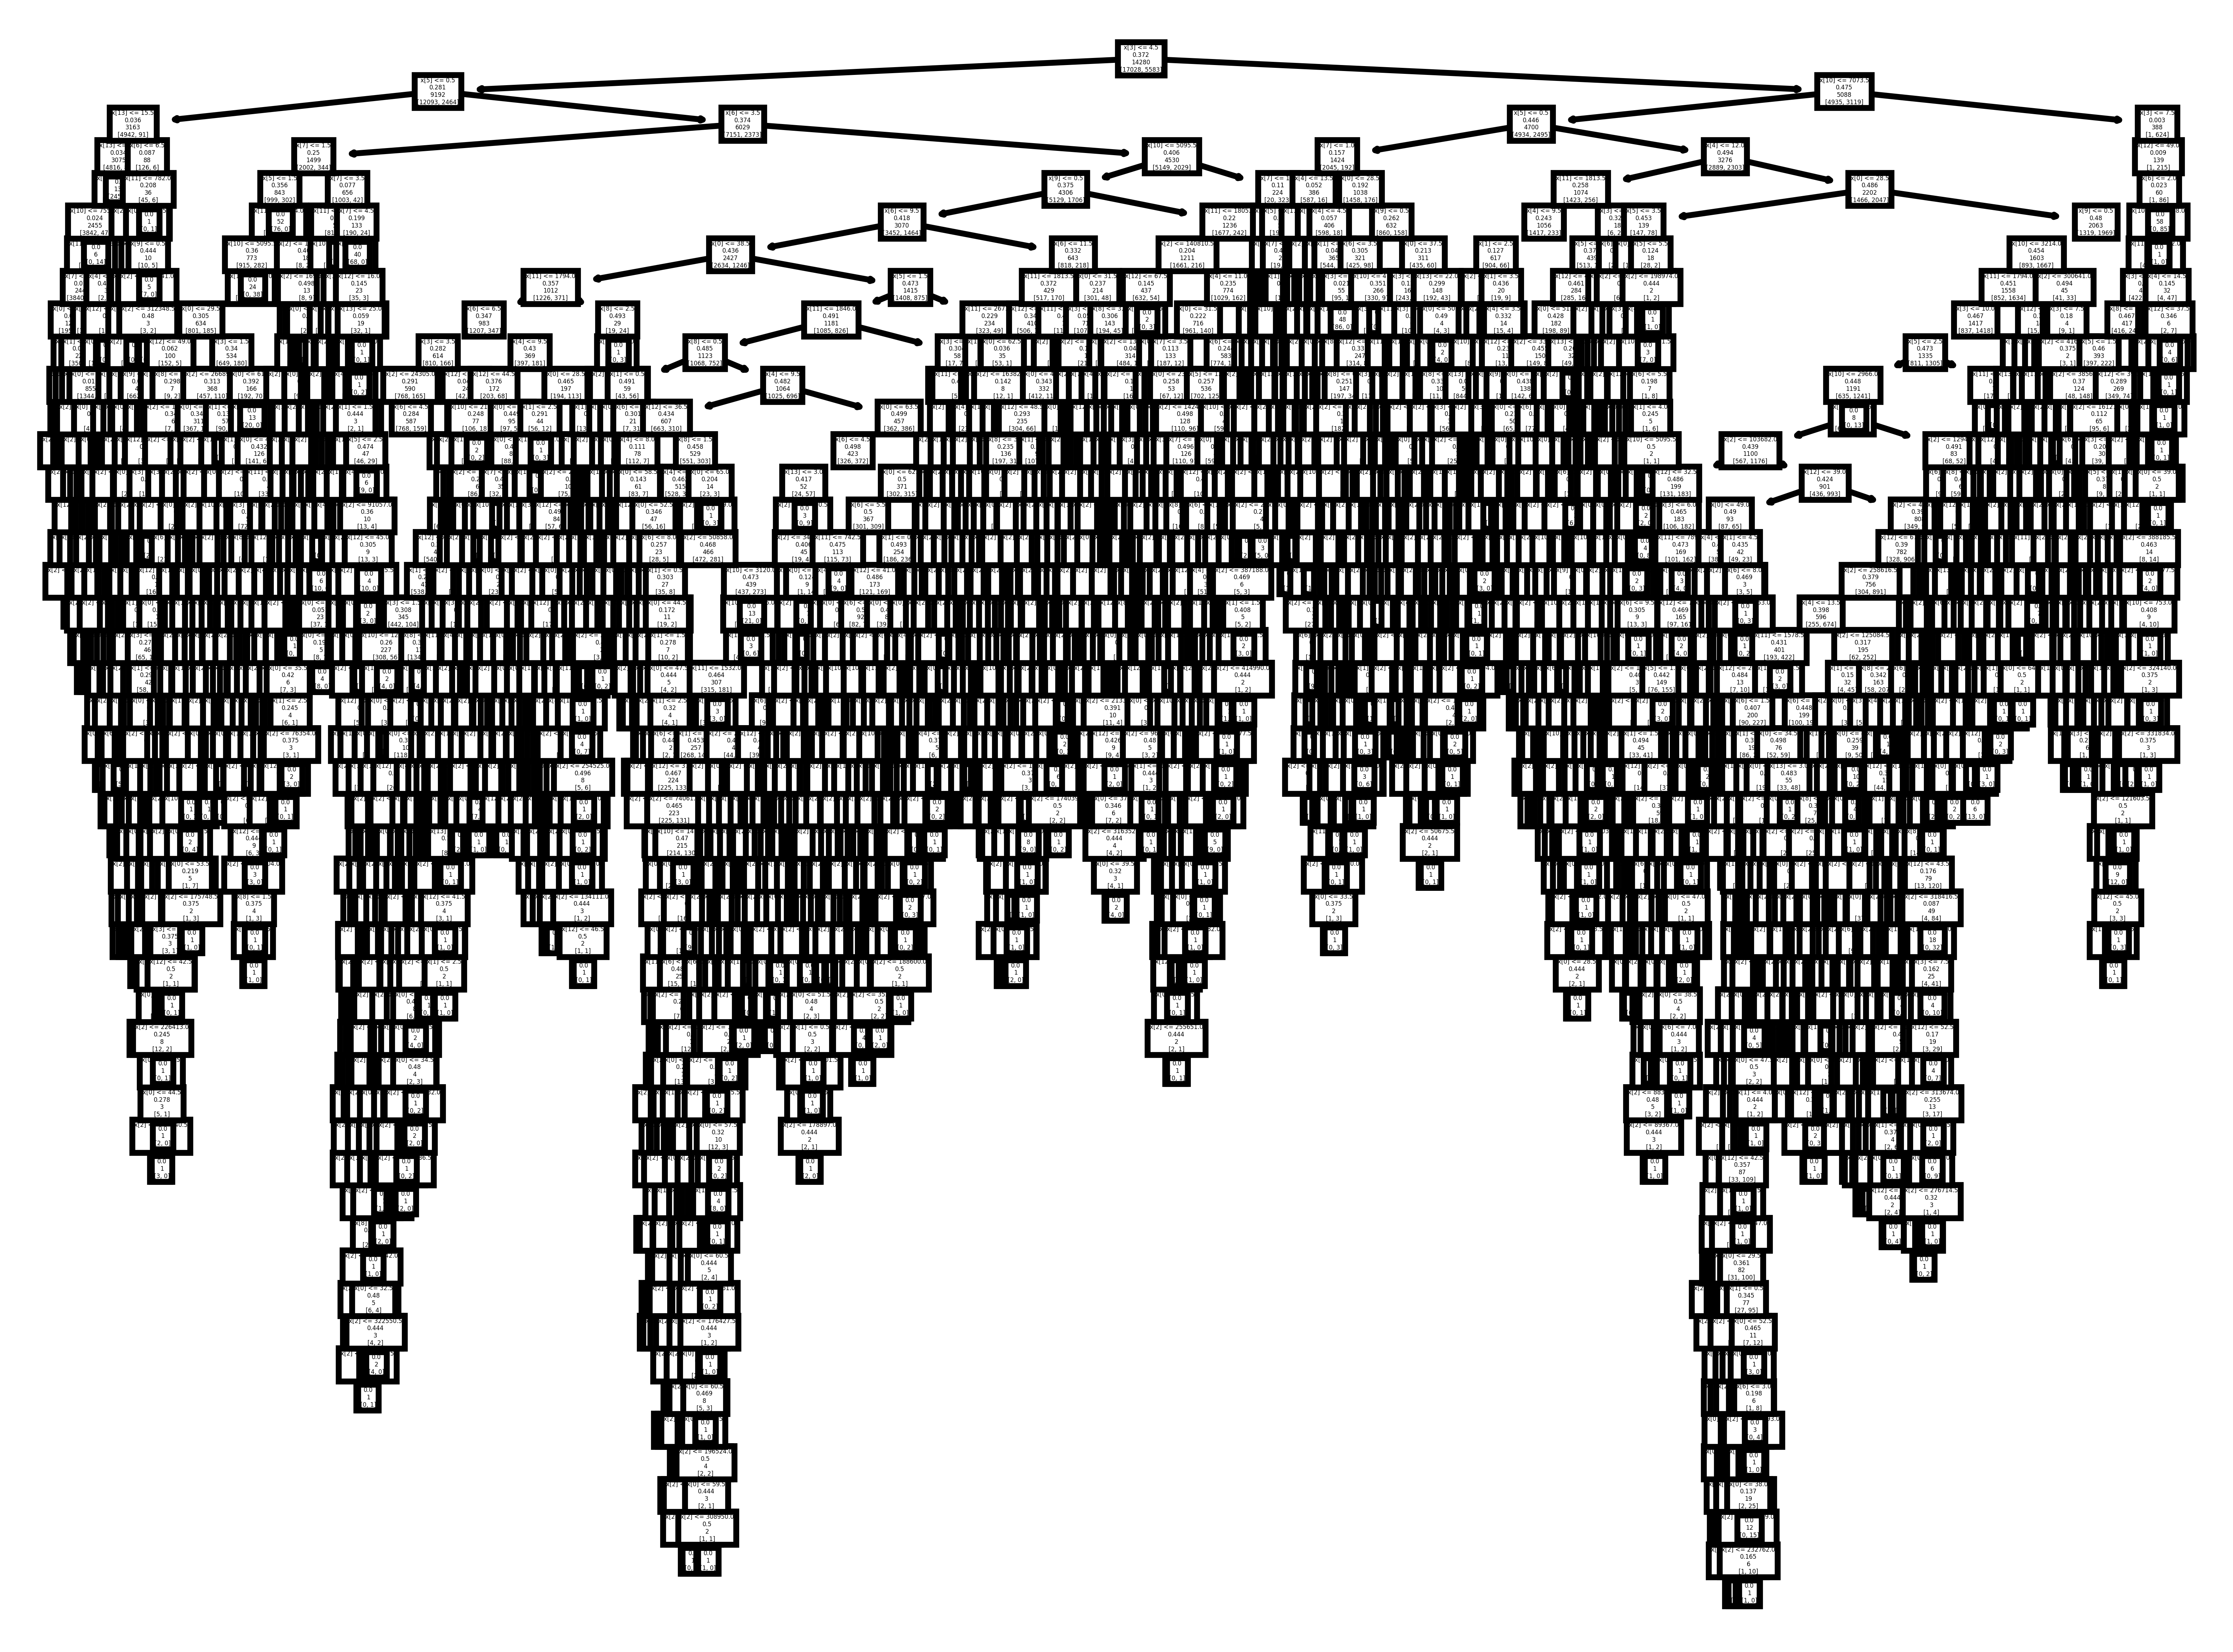

In [50]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_5.estimators_[0], label=None);

In [51]:
target_pred = RDF_5.predict(features_test)
target_pred

array([0, 0, 0, ..., 1, 0, 1])

In [52]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8368935473884392
Precision: 0.7844156830615083
Precision: 0.8368935473884392
Precision: 0.8318944692454197
Recall: 0.7627498298966522
Recall: 0.8368935473884392
Recall: 0.8368935473884392
RMSE: 0.40386439879192215
[[15480  1543]
 [ 2145  3443]]


In [53]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.68462253, 0.06824112],
       [0.09486533, 0.15227102]])

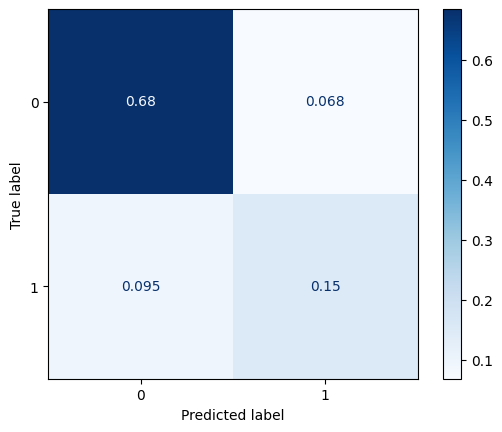

In [54]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

N-20

In [55]:
RDF_20 = RandomForestClassifier(n_estimators=20)
RDF_20 = RDF_20.fit(features_train, target_train)

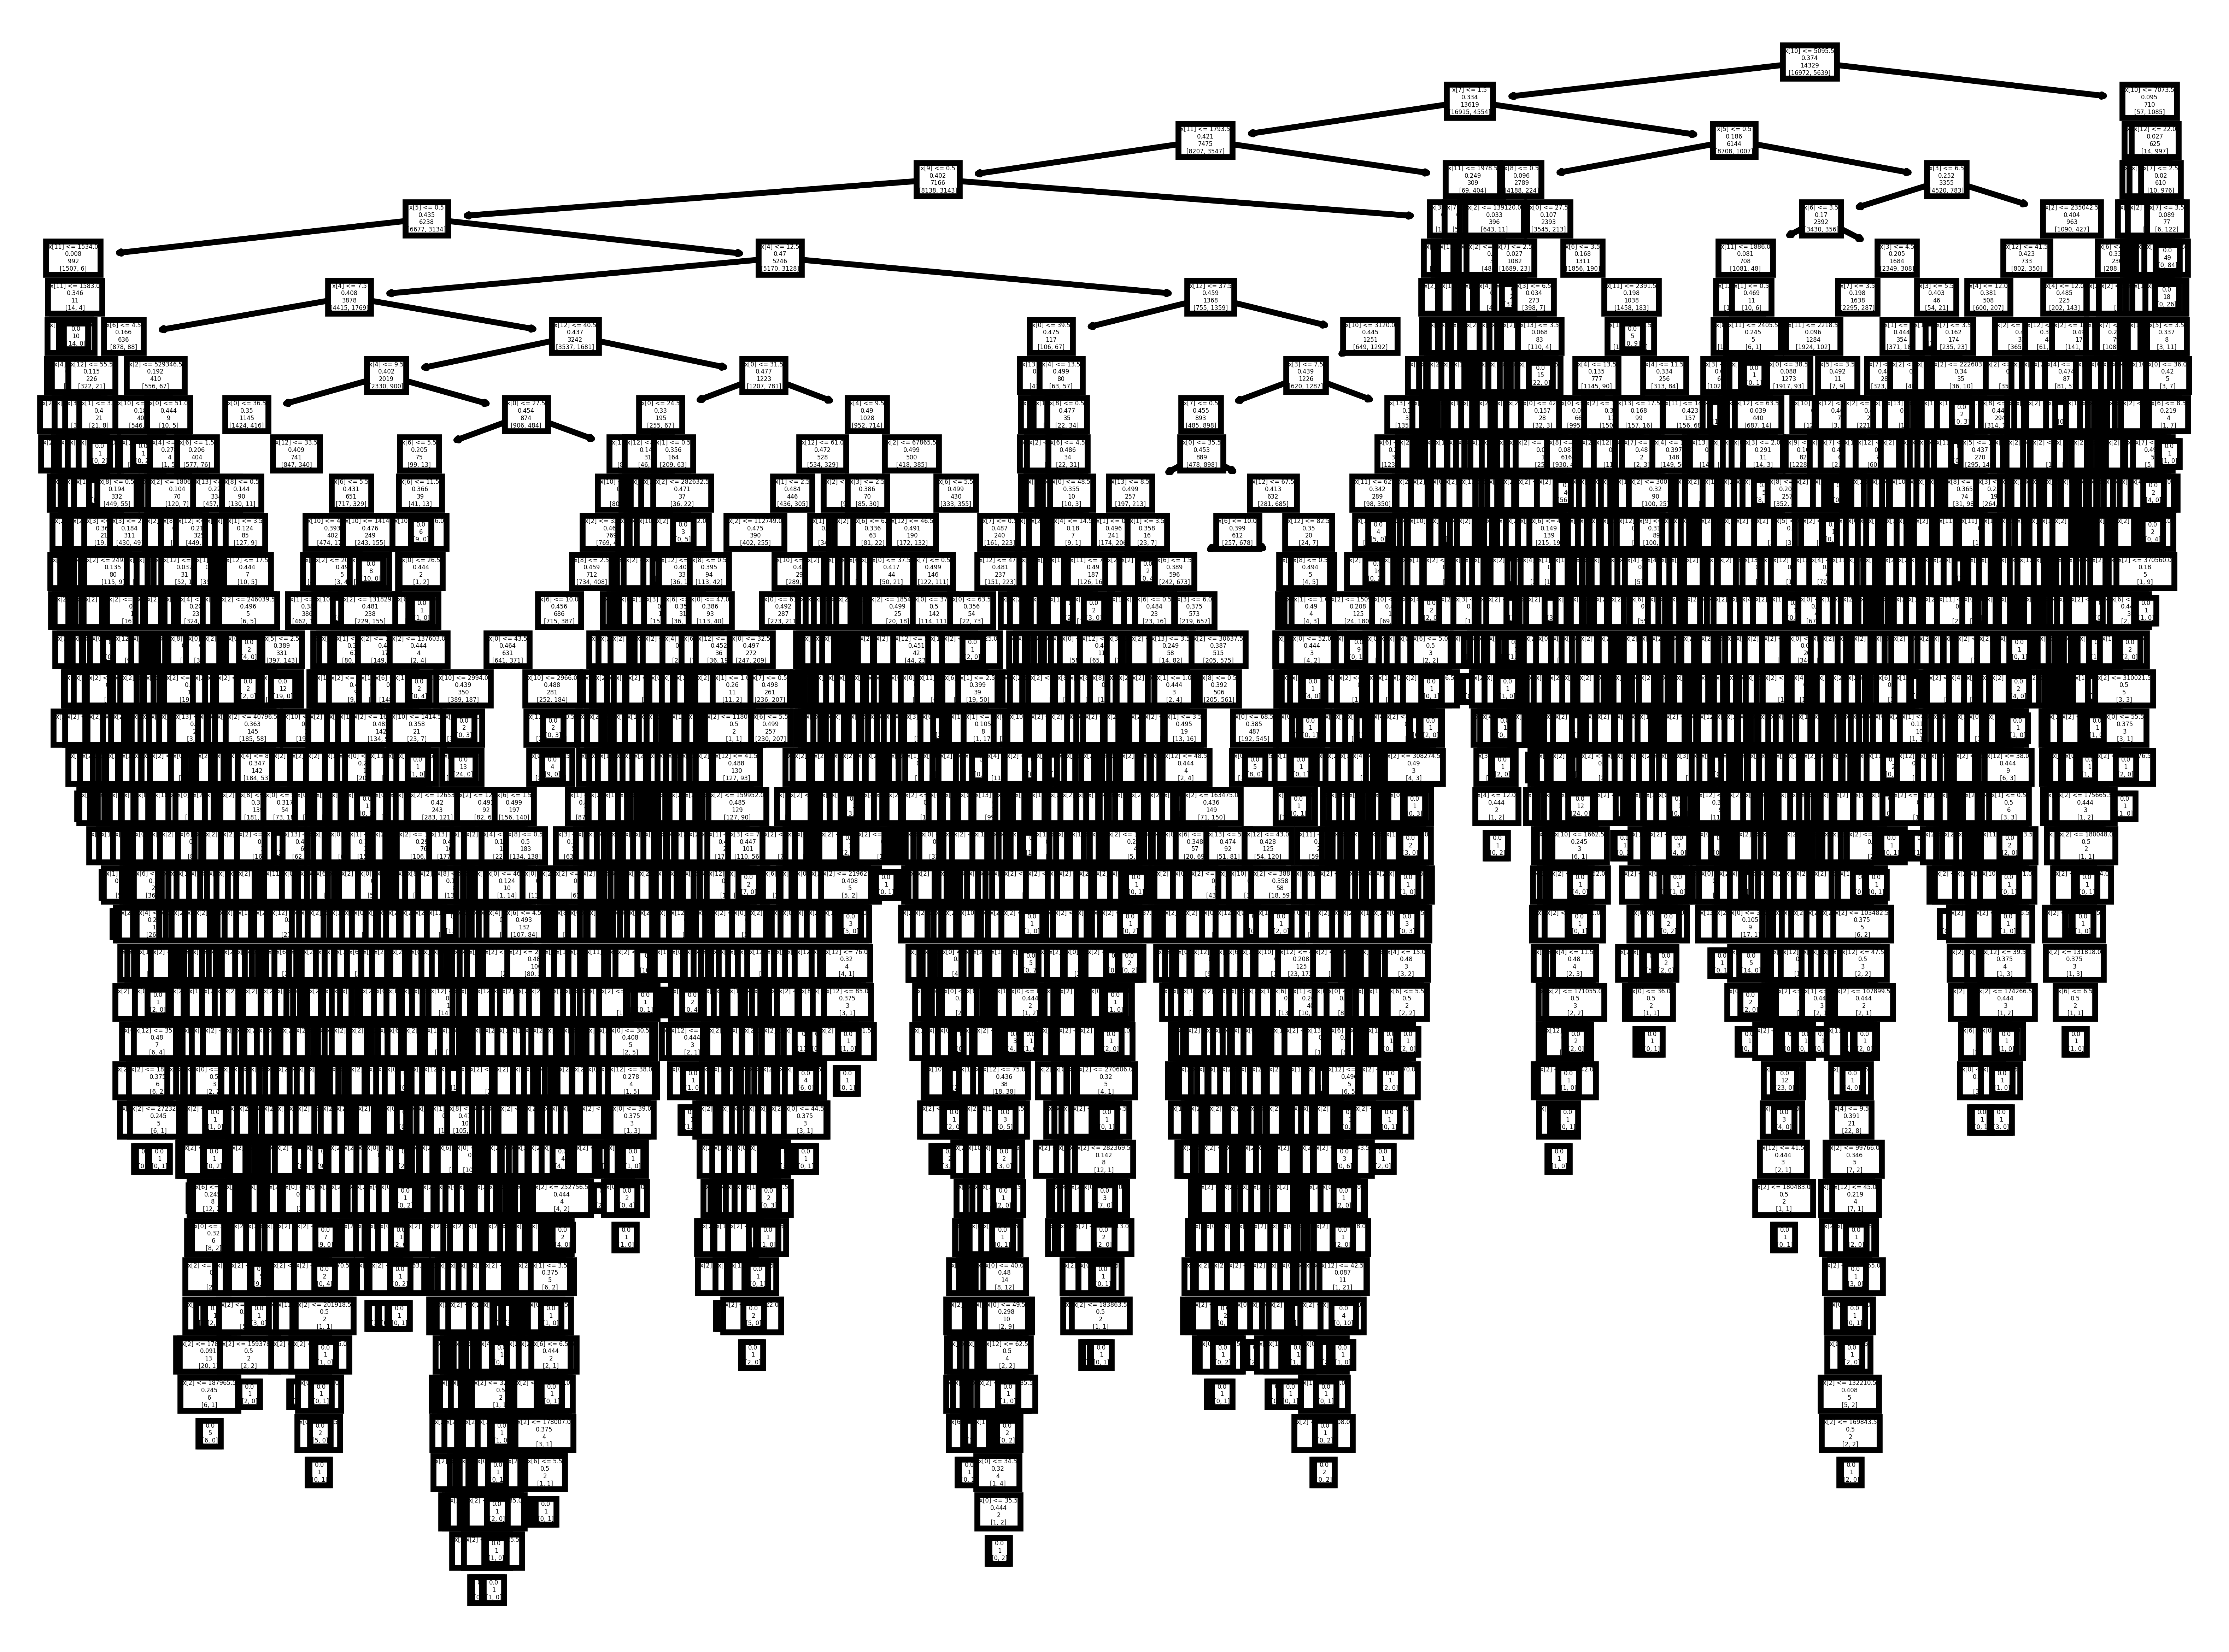

In [56]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_20.estimators_[0], label=None);

In [58]:
target_pred = RDF_20.predict(features_test)
target_pred

array([0, 0, 0, ..., 1, 0, 1])

In [59]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8494538056698068
Precision: 0.8071304294850516
Precision: 0.8494538056698068
Precision: 0.8434343681747729
Recall: 0.7692282171104478
Recall: 0.8494538056698068
Recall: 0.8494538056698068
RMSE: 0.38800282773479017
[[15795  1228]
 [ 2176  3412]]


In [60]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.6985538 , 0.05430985],
       [0.09623635, 0.1509    ]])

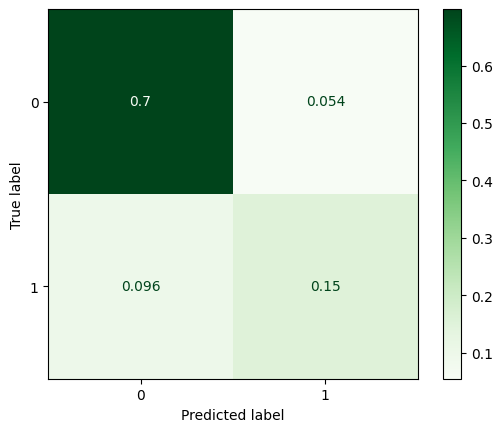

In [61]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Greens)

In [62]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.90272618, 0.66718811])

In [63]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7849571463493971

In [64]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8494538056698067

In [65]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8445161626886432

N-25

In [66]:
RDF_25 = RandomForestClassifier(n_estimators=20)
RDF_25 = RDF_25.fit(features_train, target_train)

In [ ]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF_20.estimators_[0], label=None);

Error in callback <function _draw_all_if_interactive at 0x7d4d8a1b7d90> (for post_execute):


KeyboardInterrupt: 

In [ ]:
target_pred = RDF_25.predict(features_test)
target_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)

Accuracy: 0.8516651187475123
Precision: 0.8134186235302181
Precision: 0.8516651187475123
Precision: 0.845659870223319
Recall: 0.7705386527383922
Recall: 0.8516651187475123
Recall: 0.8516651187475123
RMSE: 0.3851426764881915


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.69992482, 0.05081597],
       [0.09751891, 0.1517403 ]])

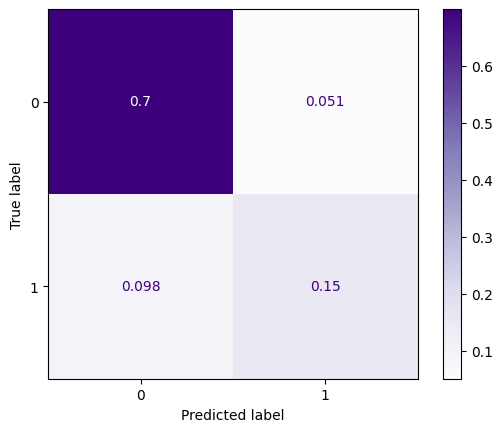

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Purples)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.90418785, 0.67169146])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7879396589402214

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8516651187475123

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8462359871979762

# **J48 - Decision Tree**

Create the Decision Tree classifier object, train it and predict the response using the defined features and target.

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


N-2

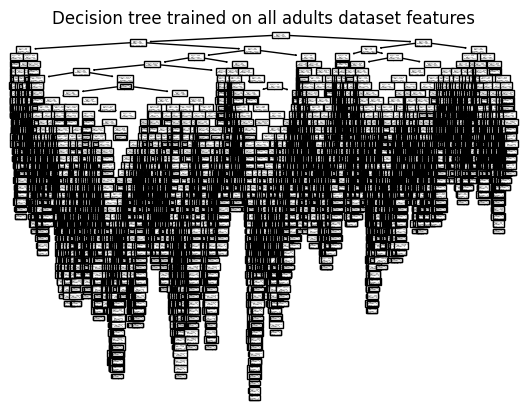

In [ ]:
DecTree_2 = tree.DecisionTreeClassifier(max_features = 2)
DecTree = DecTree_2.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_2)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_2.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.7980628897439299
Precision: 0.7303444386101257
Precision: 0.7980628897439299
Precision: 0.7986897450103221
Recall: 0.731757557925016
Recall: 0.7980628897439299
Recall: 0.7980628897439299
RMSE: 0.4493741317166244
[[14666  2309]
 [ 2257  3379]]


Evaluate the accuracy as to how many times was the model correct.

In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.7980628897439299


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.64862235, 0.10211844],
       [0.09981867, 0.14944054]])

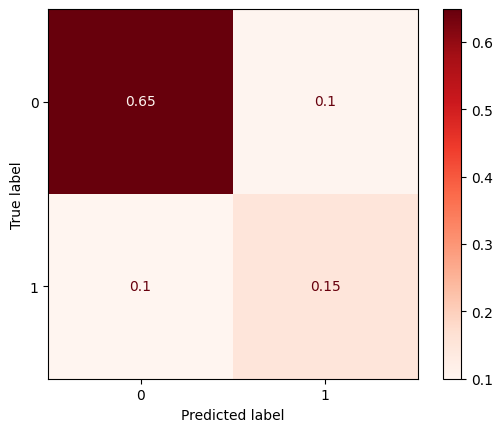

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.86530179, 0.59678559])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7310436879237459

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.7980628897439299

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.7983716519034632

N-5

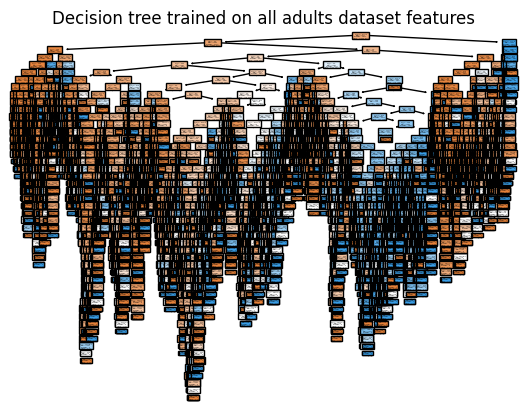

In [ ]:
DecTree_5 = tree.DecisionTreeClassifier(max_features = 5)
DecTree = DecTree_5.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_5, filled=True)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_5.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8057140329927911
Precision: 0.7407811291243336
Precision: 0.8057140329927911
Precision: 0.8082240344064111
Recall: 0.7466905000569659
Recall: 0.8057140329927911
Recall: 0.8057140329927911
RMSE: 0.44077881869165275
[[14673  2302]
 [ 2091  3545]]


In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.8057140329927911


In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.64893194, 0.10180885],
       [0.09247711, 0.1567821 ]])

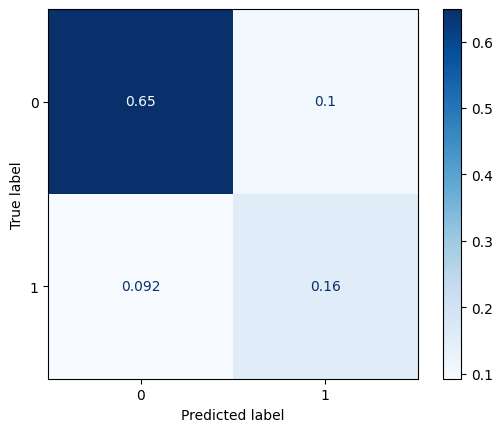

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.8697946 , 0.61743447])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.74361453403295

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8057140329927911

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8068915127088699

N-20

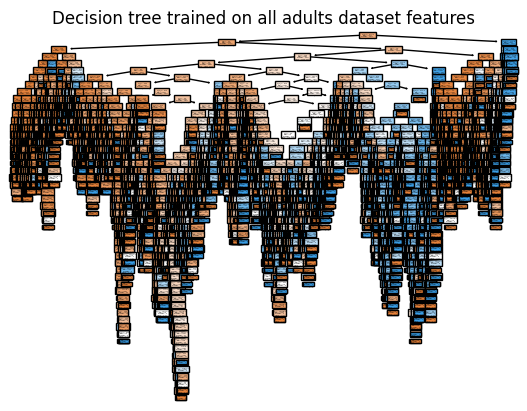

In [ ]:
DecTree_20 = tree.DecisionTreeClassifier(max_features = 20)
DecTree = DecTree_20.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_20, filled=True)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_20.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8089425500862412
Precision: 0.7448234487621946
Precision: 0.8089425500862412
Precision: 0.8099301461664541
Recall: 0.7472999526502779
Recall: 0.8089425500862412
Recall: 0.8089425500862412
RMSE: 0.43710118955884664
[[14772  2203]
 [ 2117  3519]]


In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.8089425500862412


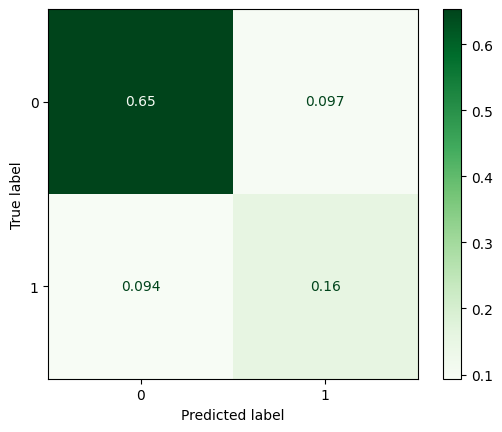

In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Greens)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.8724309 , 0.61965135])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7460411235695088

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8089425500862412

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8094232683551863

N-25

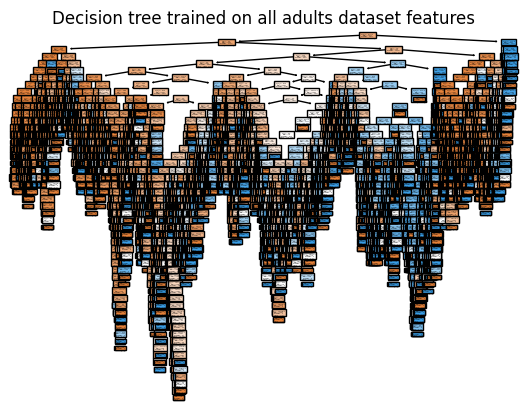

In [ ]:
DecTree_25 = tree.DecisionTreeClassifier(max_features = 25)
DecTree = DecTree_25.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_25, filled=True)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [ ]:
target_pred = DecTree_25.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1]
Accuracy: 0.8062005218698863
Precision: 0.7411446592681152
Precision: 0.8062005218698863
Precision: 0.8067560108683537
Recall: 0.7425107216285796
Recall: 0.8062005218698863
Recall: 0.8062005218698863
RMSE: 0.4402266213328241
[[14760  2215]
 [ 2167  3469]]


In [ ]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.8062005218698863


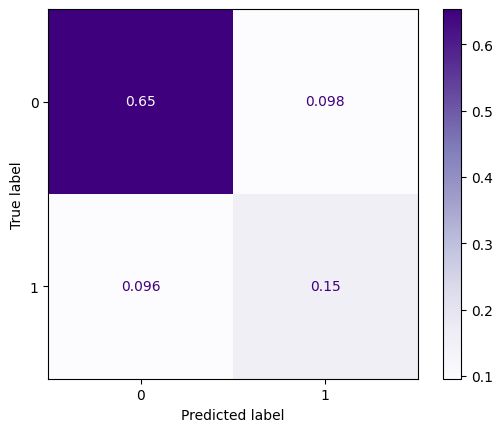

In [ ]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Purples)

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.87074509, 0.61289753])

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.7418213076435445

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.8062005218698863

In [ ]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.8064742090794216